In [2]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [3]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_df_100pos.csv', low_memory=False)

In [4]:
def feet_to_meters(height):
    if isinstance(height, str):
        feet, inches = map(int, height.split('-'))
        total_feet = feet + inches / 12  # Convert inches to feet
        total_meters = total_feet * 0.3048  # Convert feet to meters
        return round(total_meters, 2)  # Round to 2 decimals
    else:
        return None  # Handle missing or invalid values

In [5]:
# Apply the function to convert heights
df_100pos['PLAYER_HEIGHT_METERS'] = df_100pos['HEIGHT'].apply(feet_to_meters)

In [6]:
# Adding additional advanced metric columns

# Shooting efficiency 
df_100pos['FG3A%'] = df_100pos['FG3A'] / df_100pos['FGA']
df_100pos['PTS/FGA'] = df_100pos['PTS'] / df_100pos['FGA']
df_100pos['FG3M/FGM'] = df_100pos['FG3M'] / df_100pos['FGM']
df_100pos['FTA/FGA'] = df_100pos['FTA'] / df_100pos['FGA']

# True Shooting Percentage
df_100pos['TRU%'] = 0.5 * df_100pos['PTS'] / (df_100pos['FGA'] + 0.475 * df_100pos['FTA'])

# Assists to Turnover Ratio
df_100pos['AST_TOV'] = df_100pos['AST'] / df_100pos['TOV']

df_100pos[(df_100pos['PLAYER_NAME'] == 'Vlade Divac')]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
3713,124,Vlade Divac,1610612766,CHH,29.0,81,53,28,0.654,53.7,7.9,16.0,0.494,0.2,0.9,0.234,3.3,4.9,0.683,4.6,9.1,13.7,5.7,3.6,1.9,3.4,1.1,5.2,0.1,19.4,1996-97,Regular Season,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.056250,1.212500,0.025316,0.306250,0.529259,1.583333
3714,124,Vlade Divac,1610612766,CHH,29.0,3,0,3,0.000,54.4,9.9,21.6,0.457,0.0,1.4,0.000,5.6,7.0,0.800,6.1,6.1,12.2,4.7,2.8,1.4,2.8,2.3,5.2,2.8,25.4,1996-97,Playoffs,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.064815,1.175926,0.000000,0.324074,0.509529,1.678571
3715,124,Vlade Divac,1610612766,CHH,30.0,64,40,24,0.625,52.4,7.8,15.6,0.498,0.1,0.4,0.214,3.8,5.5,0.691,5.3,9.7,15.1,5.0,3.3,2.4,2.7,1.0,5.2,0.0,19.4,1997-98,Regular Season,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.025641,1.243590,0.012821,0.352564,0.532601,1.515152
3716,124,Vlade Divac,1610612766,CHH,30.0,9,4,5,0.444,55.3,6.8,14.0,0.483,0.0,0.2,0.000,3.2,5.3,0.606,4.0,11.8,15.8,5.0,3.5,1.1,2.3,1.6,5.5,0.2,16.7,1997-98,Playoffs,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.014286,1.192857,0.000000,0.378571,0.505524,1.428571
3717,124,Vlade Divac,1610612758,SAC,31.0,50,27,23,0.540,48.9,7.3,15.5,0.470,0.3,1.2,0.256,5.0,7.1,0.702,3.9,10.0,13.9,6.0,3.6,1.2,1.4,1.3,4.6,0.1,19.9,1998-99,Regular Season,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.077419,1.283871,0.041096,0.458065,0.527222,1.666667
3718,124,Vlade Divac,1610612758,SAC,31.0,5,2,3,0.400,52.2,6.6,14.8,0.446,0.3,1.3,0.200,7.9,9.5,0.833,2.4,10.8,13.2,6.1,5.0,2.1,1.1,1.1,4.5,0.3,21.4,1998-99,Playoffs,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.087838,1.445946,0.045455,0.641892,0.554045,1.220000
3719,124,Vlade Divac,1610612758,SAC,32.0,82,44,38,0.537,46.6,7.5,15.0,0.503,0.1,0.5,0.269,4.5,6.5,0.691,3.4,9.4,12.9,4.8,3.7,2.0,2.0,1.4,4.9,1.2,19.7,1999-00,Regular Season,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.033333,1.313333,0.013333,0.433333,0.544575,1.297297
3720,124,Vlade Divac,1610612758,SAC,32.0,5,2,3,0.400,51.7,6.4,18.0,0.357,0.0,0.6,0.000,5.1,7.4,0.696,2.9,8.7,11.6,4.5,2.9,2.3,1.3,2.3,7.1,1.3,18.0,1999-00,Playoffs,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.033333,1.000000,0.000000,0.411111,0.418313,1.551724
3721,124,Vlade Divac,1610612758,SAC,33.0,81,55,26,0.679,49.6,7.5,15.5,0.482,0.1,0.3,0.286,5.0,7.2,0.691,4.2,9.6,13.8,4.7,3.9,1.8,1.9,1.7,5.0,0.0,20.0,2000-01,Regular Season,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.019355,1.290323,0.013333,0.464516,0.528541,1.205128
3722,124,Vlade Divac,1610612758,SAC,33.0,8,3,5,0.375,47.4,5.9,16.8,0.350,0.2,0.6,0.333,6.1,8.0,0.763,4.2,9.9,14.1,4.0,3.8,1.7,2.5,1.9,5.3,0.0,18.1,2000-01,Playoffs,NaN,Serbia,1989,1,26,21,C,7-1,260.0,1989,2004,2.16,0.035714,1.077381,0.033898,0.476190,0.439320,1.052632


In [7]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
df_100pos['POSITION'] = df_100pos['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [8]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'North Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [9]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [10]:
# New object for European Centers:
europe_C = filter_europe(df_100pos, 'COUNTRY', europe)
europe_C = europe_C.loc[europe_C['POSITION'].isin(['C'])]

In [11]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [13]:
# New object for Non-europe players playing at C:
non_europe_C = filter_non_europe(df_100pos)
non_europe_C = non_europe_C.loc[non_europe_C['POSITION'].isin(['C'])]

In [14]:
# Number of positions per unique European player:
europe_C.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    82
Name: PLAYER_ID, dtype: int64

In [22]:
europe_C.groupby(europe_C['COUNTRY'] == 'Netherlands')
europe_C

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
286,717,Arvydas Sabonis,1610612757,POR,32.0,69,43,26,0.623,51.3,9.6,19.2,0.498,1.4,3.8,0.371,6.5,8.4,0.777,3.3,12.6,15.9,4.3,4.4,1.8,2.4,1.0,5.9,0.0,27.0,1996-97,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21,0.197917,1.406250,0.145833,0.437500,0.582147,0.977273
287,717,Arvydas Sabonis,1610612757,POR,32.0,4,1,3,0.250,53.9,9.0,21.1,0.429,1.0,4.0,0.250,3.5,4.0,0.875,4.0,9.0,13.1,4.5,4.5,1.5,1.5,2.5,9.5,4.0,22.6,1996-97,Playoffs,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21,0.189573,1.071090,0.111111,0.189573,0.491304,1.000000
288,717,Arvydas Sabonis,1610612757,POR,33.0,73,40,33,0.548,52.1,9.1,18.5,0.493,0.7,2.6,0.261,7.2,9.1,0.798,3.3,13.0,16.3,4.9,4.2,1.5,1.8,1.0,6.0,0.0,26.1,1997-98,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21,0.140541,1.410811,0.076923,0.491892,0.571804,1.166667
289,717,Arvydas Sabonis,1610612757,POR,33.0,4,1,3,0.250,53.0,9.0,19.9,0.450,0.5,1.0,0.500,6.0,7.0,0.857,3.5,11.9,15.4,3.0,5.0,3.5,1.5,3.5,9.5,0.0,24.4,1997-98,Playoffs,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21,0.050251,1.226131,0.055556,0.351759,0.525296,0.600000
290,717,Arvydas Sabonis,1610612757,POR,34.0,50,35,15,0.700,53.3,9.2,18.9,0.485,0.3,0.9,0.292,5.3,6.9,0.771,3.5,12.1,15.5,4.7,3.4,1.3,2.5,1.3,5.8,0.0,23.9,1998-99,Regular Season,NaN,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002,2.21,0.047619,1.264550,0.032609,0.365079,0.538834,1.382353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18129,1630846,Olivier Sarr,1610612760,OKC,24.0,9,5,4,0.556,47.7,6.3,12.6,0.500,0.4,3.4,0.125,2.1,2.9,0.714,5.0,8.0,13.0,1.7,1.7,0.4,2.1,0.0,7.1,5.0,15.1,2022-23,Regular Season,Kentucky,France,Undrafted,Undrafted,Undrafted,30,C,6-10,240.0,2021,2023,2.08,0.269841,1.198413,0.063492,0.230159,0.540154,1.000000
18130,1630209,Omer Yurtseven,1610612748,MIA,24.0,56,39,17,0.696,49.1,9.0,17.2,0.526,0.1,0.8,0.091,2.6,4.2,0.623,5.9,14.5,20.4,3.4,2.8,1.2,1.4,1.3,5.8,3.6,20.8,2021-22,Regular Season,Georgetown,Turkey,Undrafted,Undrafted,Undrafted,77,C,6-11,275.0,2020,2023,2.11,0.046512,1.209302,0.011111,0.244186,0.541808,1.214286
18131,1630209,Omer Yurtseven,1610612748,MIA,24.0,9,5,4,0.556,46.7,14.8,22.2,0.667,0.0,2.5,0.000,1.2,3.7,0.333,1.2,7.4,8.6,3.7,0.0,0.0,1.2,1.2,2.5,2.5,30.9,2021-22,Playoffs,Georgetown,Turkey,Undrafted,Undrafted,Undrafted,77,C,6-11,275.0,2020,2023,2.11,0.112613,1.391892,0.000000,0.166667,0.644892,inf
18132,1630209,Omer Yurtseven,1610612748,MIA,25.0,9,5,4,0.556,46.2,8.9,15.0,0.593,1.7,3.9,0.429,2.8,3.3,0.833,4.4,8.3,12.8,1.1,2.2,1.1,1.1,0.6,8.9,5.0,22.2,2022-23,Regular Season,Georgetown,Turkey,Undrafted,Undrafted,Undrafted,77,C,6-11,275.0,2020,2023,2.11,0.260000,1.480000,0.191011,0.220000,0.669986,0.500000


In [13]:
# Number of positions per unique US player:
non_europe_C.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    346
Name: PLAYER_ID, dtype: int64

In [14]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_C['Europe'] = 'European'
non_europe_C['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_C, non_europe_C])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'PLAYER_HEIGHT_METERS']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].a

alt.VConcatChart(...)

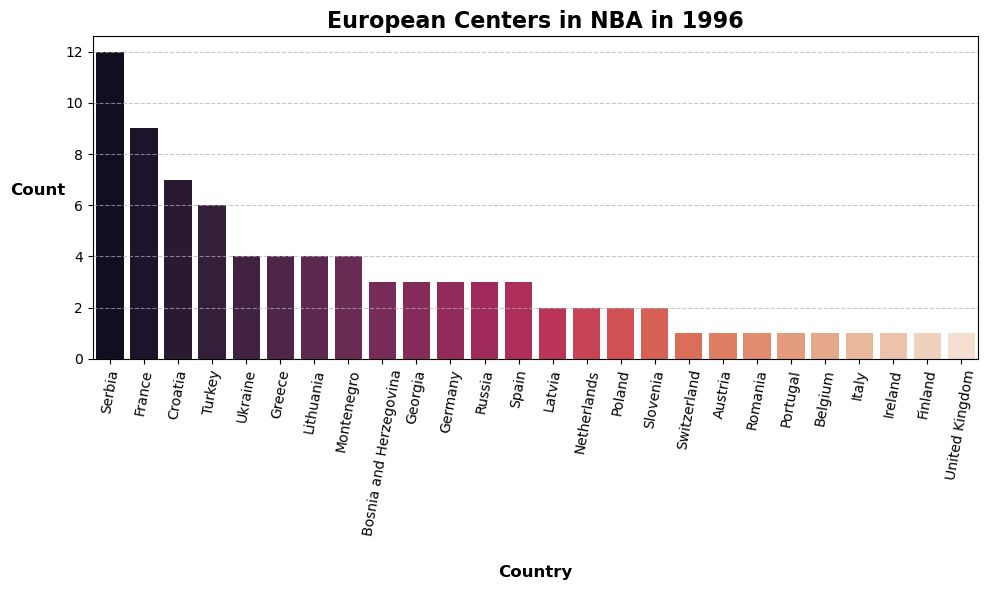

In [18]:
## Bar chart of centers per country since 1996

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Season count per country per player:
above_avg_C = europe_C.groupby('COUNTRY')['PLAYER_NAME'].nunique().reset_index()

# Sort the DataFrame by 'Unique Player Count' in descending order
above_avg_C = above_avg_C.sort_values(by='PLAYER_NAME', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='COUNTRY', y="PLAYER_NAME", data=above_avg_C, palette='rocket', linewidth=2)  # Create a count plot

plt.xticks(rotation=80)  # Rotate x-axis labels for better readability with many countries

plt.title("European Centers in NBA in 1996", weight='bold', fontsize=16)
plt.xlabel("Country", rotation=0, labelpad=20, weight='bold', fontsize=12)
plt.ylabel("Count", rotation=0, labelpad=20, weight='bold', fontsize=12)
plt.ylim(ymin=0)        # Start y-axis at zero

# Set the y-axis to show only integer ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

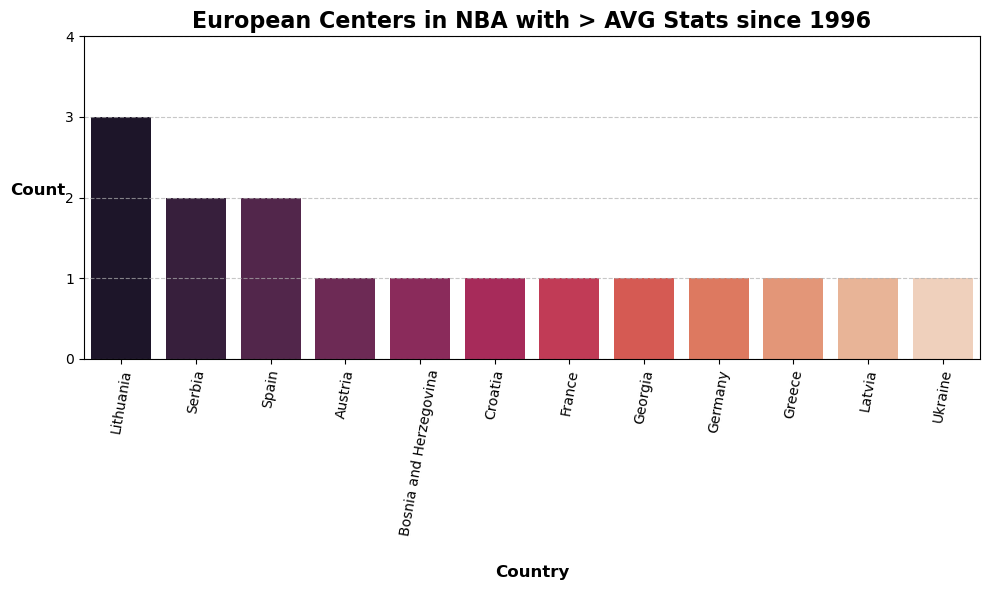

In [21]:
## Bar chart of centers with above average stats

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np


# Step 1: Filter 'europe_C' based on the above AVG metrics for Centers:
filtered_df = europe_C[(europe_C['REB'] >= 13.0) & (europe_C['BLK'] >= 2.0) & (europe_C['AST'] >= 3.0)]

# Season count per country per player:
above_avg_C = filtered_df.groupby('COUNTRY')['PLAYER_NAME'].nunique().reset_index()

# Sort the DataFrame by 'Unique Player Count' in descending order
above_avg_C = above_avg_C.sort_values(by='PLAYER_NAME', ascending=False)


fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='COUNTRY', y="PLAYER_NAME", data=above_avg_C, palette='rocket', linewidth=2)  # Create a count plot

plt.xticks(rotation=80)  # Rotate x-axis labels for better readability with many countries

plt.title("European Centers in NBA with > AVG Stats since 1996", weight='bold', fontsize=16)
plt.xlabel("Country", rotation=0, labelpad=20, weight='bold', fontsize=12)
plt.ylabel("Count", rotation=0, labelpad=20, weight='bold', fontsize=12)
plt.ylim(ymin=0)
plt.ylim(ymax=4)           # Start y-axis at zero

# Set the y-axis to show only integer ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot